In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## EDA

In [1]:
import numpy as np
import pandas as pd

In [19]:
chick = pd.read_csv('/content/drive/MyDrive/30619 장우준 인공지능/dataset/chick.csv')
chick

,wing_length,tail_length,comb_height,breeds
0,238,63,34,Leghorn
1,236,67,30,Leghorn
2,256,65,34,Leghorn
3,240,63,35,Leghorn
4,246,65,30,Leghorn
...,...,...,...,...
295,237,70,33,Silkie
296,252,74,37,Silkie
297,237,73,35,Silkie
298,245,73,37,Silkie


In [20]:
# 기본 정보: information
chick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wing_length  300 non-null    int64 
 1   tail_length  300 non-null    int64 
 2   comb_height  300 non-null    int64 
 3   breeds       300 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.5+ KB


In [21]:
# 평균, 표준편차, 최소최대값, 중앙값 등을 확인
chick.describe()

,wing_length,tail_length,comb_height
count,300.000000,300.000000,300.000000
mean,236.483333,68.143333,34.070000
std,13.057746,3.339656,2.181965
min,211.000000,62.000000,30.000000
25%,228.000000,66.000000,33.000000
50%,236.000000,68.000000,34.000000
75%,247.250000,71.000000,36.000000
max,260.000000,74.000000,38.000000


In [22]:
# 클래스별 샘플 수
# chick['breeds'].value_counts()
chick['breeds'].value_counts(normalize=True)

breeds
Leghorn      0.333333
Orpington    0.333333
Silkie       0.333333
Name: proportion, dtype: float64

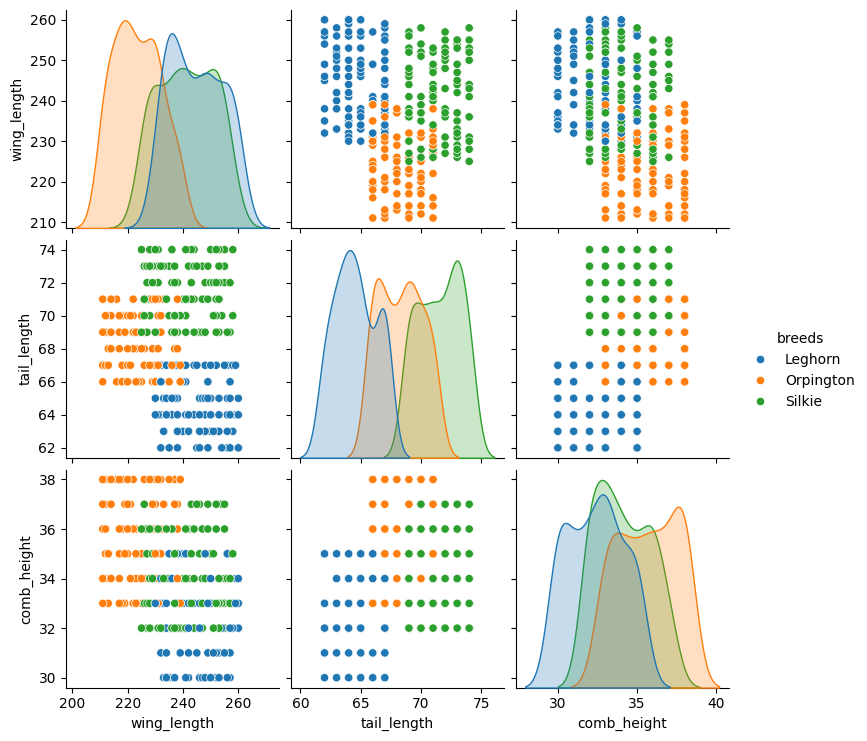

In [23]:
# 품종별 pairplot 시각화
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(chick, hue='breeds')

In [24]:
# 피쳐별 상관관계 출력
corr = chick.corr(numeric_only=True)
corr

,wing_length,tail_length,comb_height
wing_length,1.000000,-0.147925,-0.361916
tail_length,-0.147925,1.000000,0.294651
comb_height,-0.361916,0.294651,1.000000


<Axes: >

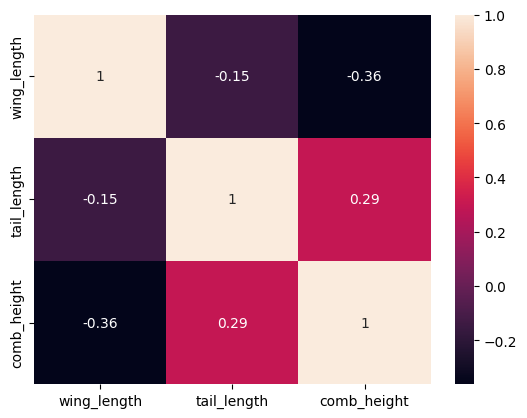

In [25]:
# 시각화
sns.heatmap(corr, annot=True)

### Data Preprocessing

In [26]:
X = chick.drop(columns='breeds')
y = chick['breeds']
display(X, y)

,wing_length,tail_length,comb_height
0,238,63,34
1,236,67,30
2,256,65,34
3,240,63,35
4,246,65,30
...,...,...,...
295,237,70,33
296,252,74,37
297,237,73,35
298,245,73,37


0      Leghorn
1      Leghorn
2      Leghorn
3      Leghorn
4      Leghorn
        ...   
295     Silkie
296     Silkie
297     Silkie
298     Silkie
299     Silkie
Name: breeds, Length: 300, dtype: object

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [28]:
print(X_train.shape, X_test.shape)

(225, 3) (75, 3)


In [29]:
# 표준화 스케일링
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)
display(X_train_scaled)

array([[-2.02560957, -0.32573403, -0.01229844],
       [ 1.03794162, -0.90971934, -0.47348991],
       [ 0.48807345,  1.13422925, -0.47348991],
       [-0.37600509, -1.78569731, -0.47348991],
       [-0.69021546,  0.55024394,  0.9100845 ],
       [-1.31863622,  0.55024394,  0.44889303],
       [ 0.56662605, -0.32573403, -0.47348991],
       [-0.29745249,  0.8422366 ,  1.37127597],
       [ 0.33096827,  0.55024394,  0.9100845 ],
       [-0.2188999 , -0.32573403, -1.85706432],
       [-0.45455768,  0.55024394,  1.83246744],
       [ 1.82346756, -1.201712  , -0.01229844],
       [-0.2188999 , -0.90971934, -0.47348991],
       [ 1.03794162, -1.49370466, -1.85706432],
       [ 1.2735994 , -1.49370466, -0.01229844],
       [ 0.64517864,  1.42622191,  1.37127597],
       [ 0.88083643,  0.25825128, -0.01229844],
       [ 0.25241567,  0.8422366 , -0.01229844],
       [ 1.50925718,  0.25825128, -0.01229844],
       [ 0.72373124, -1.78569731,  0.44889303],
       [ 1.66636237, -1.49370466, -0.473

## 머신러닝

### 1. knn

In [30]:
# knn 모델 생성, 학습, train score/test score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
print("train score=", knn.score(X_train_scaled, y_train))
print("test score=", knn.score(X_test_scaled, y_test))

train score= 0.9644444444444444
test score= 0.9333333333333333


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# knn 그리드 서치(Stratified 교차검증 사용), 최적의 하이퍼파리미터 출력
params = {'n_neighbors' : range(3, 33, 2)}
# params = {'n_neighbors' : [3,5,7,9,11]}
gs = GridSearchCV(KNeighborsClassifier(), params, cv=StratifiedKFold())
gs.fit(X_train_scaled, y_train)
# 최적의 하이퍼파라미터
print('K:', gs.best_params_)

K: {'n_neighbors': 5}


In [32]:
# 최적의 교차검증 점수 출력 + 최적의 모델로 재학습+정확도 계산
print(f"gs_knn 교차 검증: {gs.best_score_}")

knn = gs.best_estimator_
print(f"gs_knn train score: {knn.score(X_train_scaled, y_train)}")
print(f"gs_knn test score: {knn.score(X_test_scaled, y_test)}")

gs_knn 교차 검증: 0.9377777777777778
gs_knn train score: 0.9644444444444444
gs_knn test score: 0.9333333333333333


### 2. Logistic Regression

In [33]:
# Logistic Regression 모델 생성, 학습, train/test score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

print("train score=", lr.score(X_train_scaled, y_train))
print("test score=", lr.score(X_test_scaled, y_test))

train score= 0.9377777777777778
test score= 0.8933333333333333


In [34]:
print(lr.coef_, lr.intercept_)

[[ 1.02203589 -2.51736196 -0.90751852]
 [-1.82477619 -0.1071198   1.10042626]
 [ 0.8027403   2.62448176 -0.19290774]] [-0.13454702 -0.07694886  0.21149588]


In [35]:
# 그리드서치 + 교차검증: 하이퍼파라미터
params = {'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

gs = GridSearchCV(LogisticRegression(), params, cv=StratifiedKFold())
gs.fit(X_train_scaled, y_train)
# 최적의 하이퍼파라미터
print('C:', gs.best_params_)

C: {'C': 0.1}


In [36]:
# 최적의 교차검증 점수 출력 + 최적의 모델로 재학습+정확도 계산
print(f"gs_lr 교차 검증: {gs.best_score_}")

lr = gs.best_estimator_
print(f"gs_lr train score: {lr.score(X_train_scaled, y_train)}")
print(f"gs_lr test score: {lr.score(X_test_scaled, y_test)}")

gs_lr 교차 검증: 0.9422222222222223
gs_lr train score: 0.9466666666666667
gs_lr test score: 0.8933333333333333


### 3. Decision Tree

In [37]:
# Decision Tree 생성, 학습, 정확도 출력, 시각화
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print("train score=", dt.score(X_train, y_train))
print("test score=", dt.score(X_test, y_test))

train score= 1.0
test score= 0.9066666666666666


In [38]:
print(f"생성된 트리의 깊이 {dt.get_depth()}")

생성된 트리의 깊이 12


In [40]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

print("train score=", dt.score(X_train, y_train))
print("test score=", dt.score(X_test, y_test))

train score= 0.9288888888888889
test score= 0.8933333333333333


In [42]:
params = {'max_depth': [3, 4, 5, 6], 'min_samples_split': [2, 4, 6, 8, 10],'min_samples_leaf': [2, 4, 6, 8, 10] }

gs = GridSearchCV(DecisionTreeClassifier(), params, cv=StratifiedKFold())
gs.fit(X_train, y_train)
# 최적의 하이퍼파라미터
print('max_depth:', gs.best_params_)

max_depth: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [43]:
print(f"gs_dt 교차 검증: {gs.best_score_}")

dt = gs.best_estimator_
print(f"gs_dt train score: {dt.score(X_train, y_train)}")
print(f"gs_dt test score: {dt.score(X_test, y_test)}")

gs_dt 교차 검증: 0.928888888888889
gs_dt train score: 0.9688888888888889
gs_dt test score: 0.88


In [45]:
# 특성 중요도 (feature importances) 출력
print(f"특성: {X.columns}")
print(f"특성 중요도: {dt.feature_importances_}")

특성: Index(['wing_length', 'tail_length', 'comb_height'], dtype='object')
특성 중요도: [0.41999375 0.47912739 0.10087886]


In [46]:
# 성능 평가 지표: 분류 리포트 출력 (classification report)
from sklearn.metrics import classification_report

y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Leghorn       0.95      1.00      0.98        21
   Orpington       0.83      0.86      0.85        29
      Silkie       0.87      0.80      0.83        25

    accuracy                           0.88        75
   macro avg       0.89      0.89      0.89        75
weighted avg       0.88      0.88      0.88        75



In [51]:
# 혼동행렬 출력 (confustion matrix)
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2
0,21,0,0
1,1,25,3
2,0,5,20


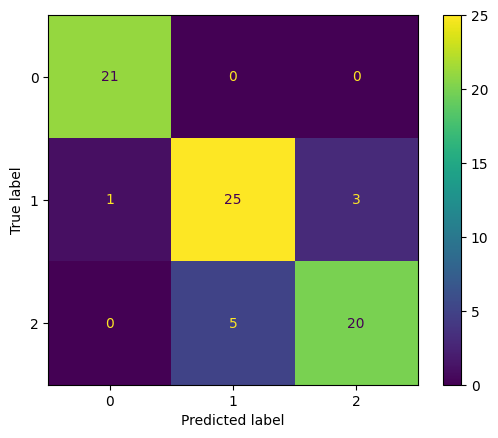

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [54]:
# 특성 중요도 (feature importances) 출력
print(f"특성: {X.columns}")
print(f"특성 중요도: {dt.feature_importances_}")

feature_df = pd.DataFrame(dt.feature_importances_, index=X.columns, columns=["importance"])
feature_df.sort_values(by="importance", ascending=False)

특성: Index(['wing_length', 'tail_length', 'comb_height'], dtype='object')
특성 중요도: [0.41999375 0.47912739 0.10087886]


,importance
tail_length,0.479127
wing_length,0.419994
comb_height,0.100879


### 4. Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print("train score=", rf.score(X_train, y_train))
print("test score=", rf.score(X_test, y_test))

train score= 1.0
test score= 0.96


In [56]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

print("train score=", rf.score(X_train, y_train))
print("test score=", rf.score(X_test, y_test))

train score= 1.0
test score= 0.9466666666666667


In [57]:
params = {'n_estimators': [100, 150, 200], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 4, 6],'min_samples_leaf': [2, 4, 6] }

gs = GridSearchCV(RandomForestClassifier(), params, cv=StratifiedKFold(), n_jobs=-1)
gs.fit(X_train, y_train)
# 최적의 하이퍼파라미터
print('best_params:', gs.best_params_)

best_params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 150}


In [58]:
print(f"gs_rf 교차 검증: {gs.best_score_}")

rf = gs.best_estimator_
print(f"gs_rf train score: {rf.score(X_train, y_train)}")
print(f"gs_rf test score: {rf.score(X_test, y_test)}")

gs_rf 교차 검증: 0.9511111111111111
gs_rf train score: 0.9688888888888889
gs_rf test score: 0.9733333333333334
